In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
ds1 = pd.read_csv("/content/matches.csv")
ds2= pd.read_csv("/content/deliveries.csv")

In [7]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103401 entries, 0 to 103400
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   match_id          103401 non-null  int64  
 1   inning            103401 non-null  int64  
 2   batting_team      103401 non-null  object 
 3   bowling_team      103401 non-null  object 
 4   over              103401 non-null  int64  
 5   ball              103401 non-null  int64  
 6   batsman           103401 non-null  object 
 7   non_striker       103401 non-null  object 
 8   bowler            103401 non-null  object 
 9   is_super_over     103401 non-null  int64  
 10  wide_runs         103401 non-null  int64  
 11  bye_runs          103401 non-null  int64  
 12  legbye_runs       103401 non-null  int64  
 13  noball_runs       103401 non-null  int64  
 14  penalty_runs      103401 non-null  int64  
 15  batsman_runs      103401 non-null  int64  
 16  extra_runs        10

In [18]:
win_per_season = ds1.groupby("season")["winner"].value_counts()
win_per_season

season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: winner, Length: 100, dtype: int64

**Team Won by Maximum runs**

In [20]:
ds1.iloc[ds1['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

**Team Won by Maximum wickets**

In [23]:
ds1.iloc[ds1['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

**Team Won by Minimum runs**

In [25]:
ds1.iloc[ds1[ds1['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

**Team Won by Minimum wickets**

In [26]:
ds1.iloc[ds1[ds1['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

# **Data Visualization**

## **Matches played in each IPL season**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


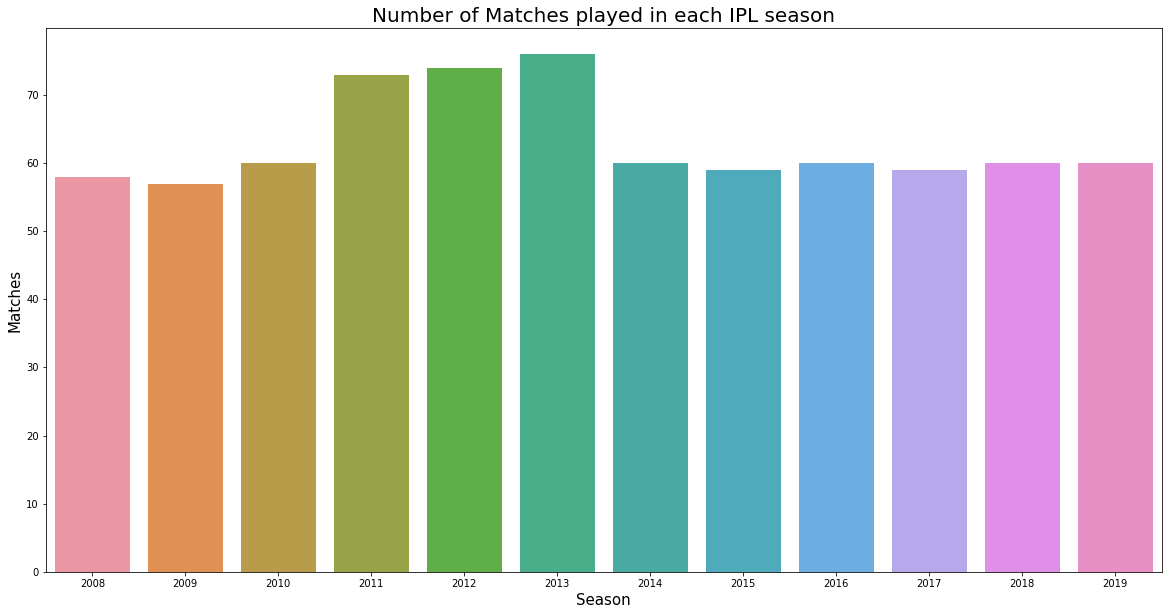

In [32]:
plt.figure(figsize=(20,10))
sns.countplot('season',data=ds1)
plt.title("Number of Matches played in each IPL season",fontsize='20')
plt.xlabel("Season",fontsize='15')
plt.ylabel('Matches',fontsize='15')
plt.show()

## **Most Successful IPL Team**

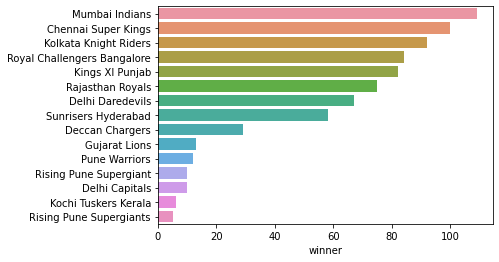

In [33]:
data = ds1.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h')

Mumbai Indians is the most successful IPL team

## **Top player of the Match**

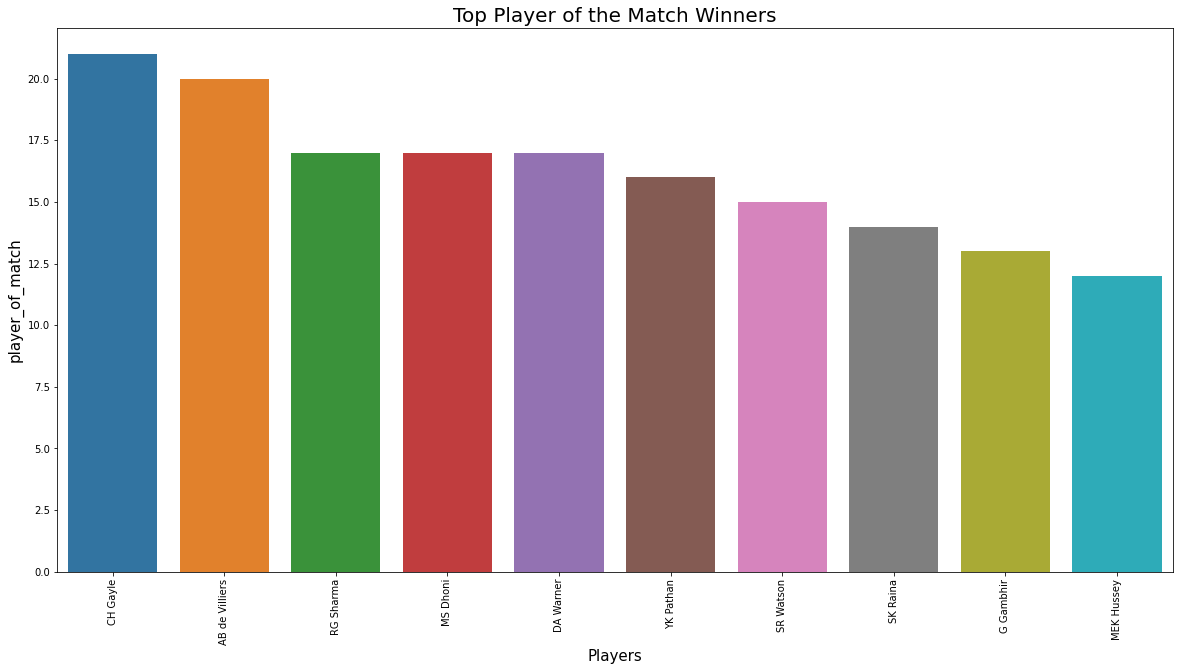

In [34]:
top_players = ds1.player_of_match.value_counts()[:10]
plt.figure(figsize=(20,10))
plt.xlabel("Players", fontsize='15')
plt.ylabel("Count", fontsize='15')
plt.title("Top Player of the Match Winners", fontsize='20')
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v');
plt.show()

CH Gayle is the most successful player in all  match winners.





## **No. of Matches in Each Venue**

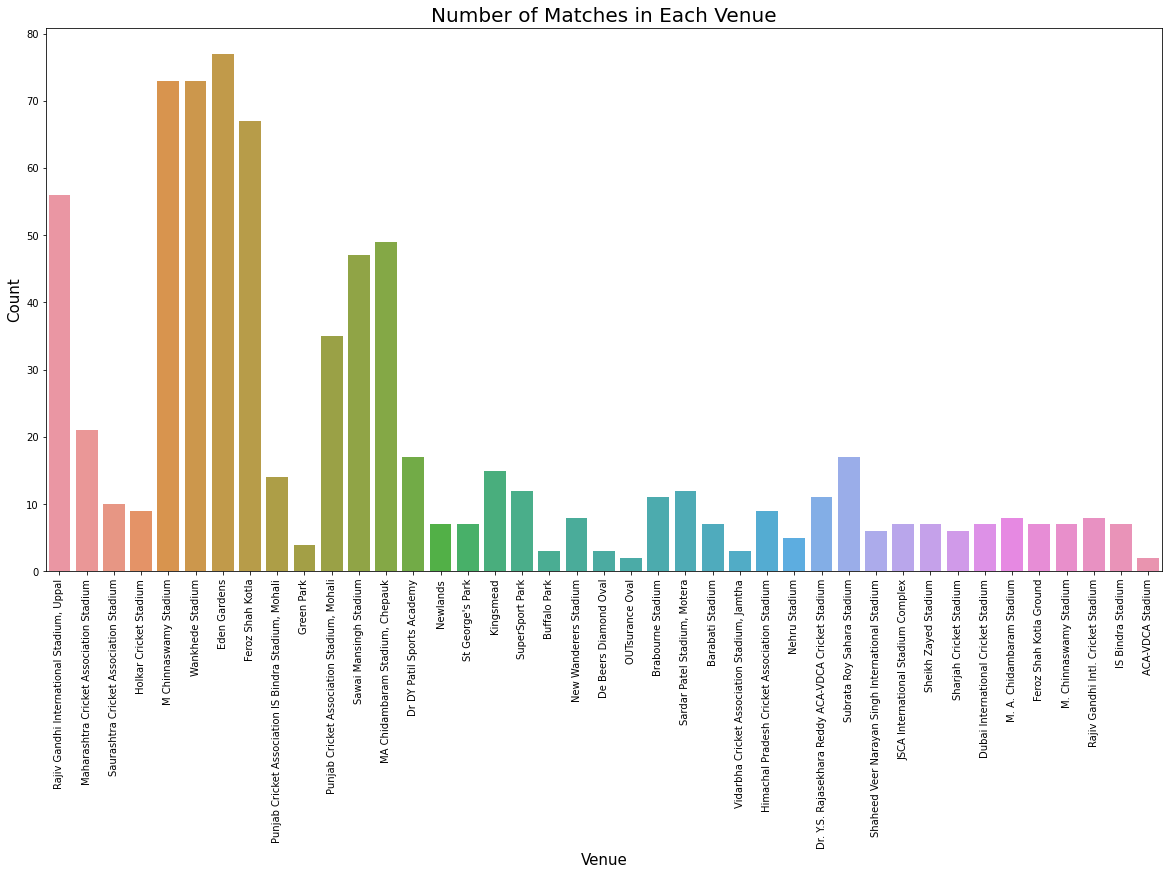

In [36]:
plt.figure(figsize=(20,10))
sns.countplot(x='venue',data=ds1)
plt.title('Number of Matches in Each Venue', fontsize='20')
plt.xlabel('Venue', fontsize='15')
plt.ylabel('Count', fontsize='15')
plt.xticks(rotation='90')
plt.show()

Most no. of matches were played in Eden Gardens

## **Matches Played by Each Team**

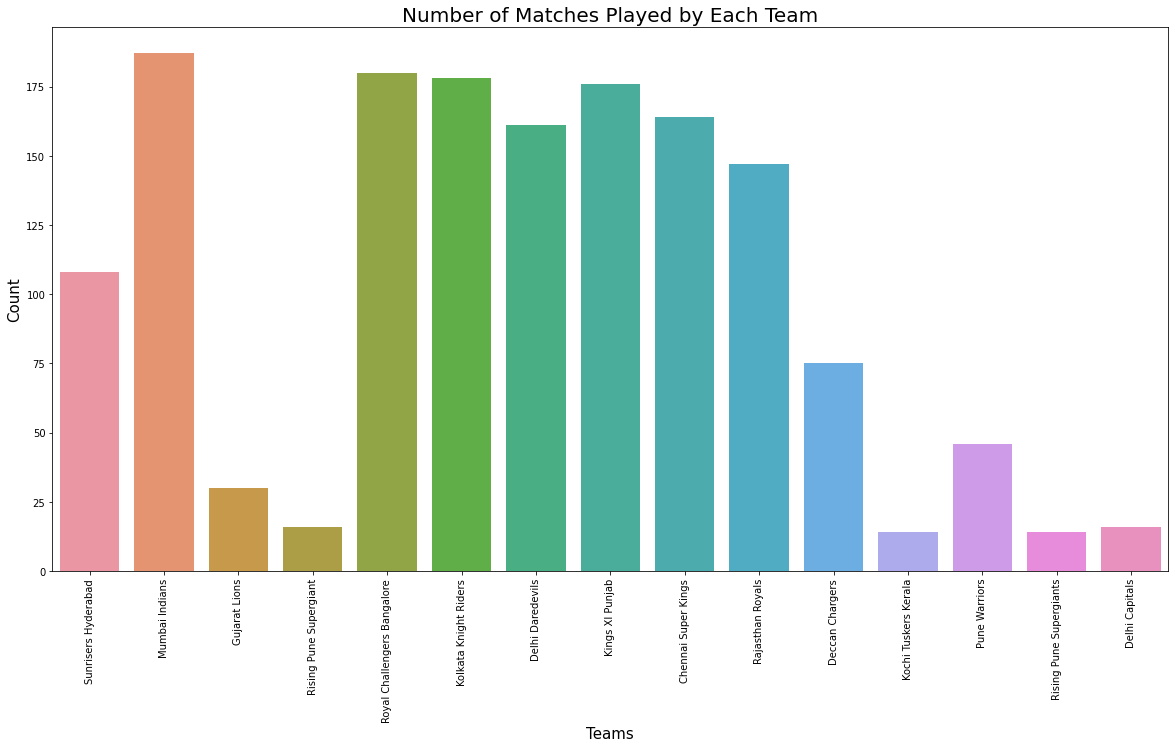

In [37]:
temp_df = pd.melt(ds1, id_vars=['id','season'], value_vars=['team1', 'team2'])
plt.figure(figsize=(20,10))
sns.countplot(x='value', data=temp_df)
plt.title("Number of Matches Played by Each Team", fontsize='20')
plt.xlabel('Teams', fontsize='15')
plt.ylabel('Count', fontsize='15')
plt.xticks(rotation='vertical')
plt.show()

In [41]:
temp_ds1 = ds1.drop_duplicates(subset=['season'], keep='last')
temp_ds1[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [42]:
temp_ds1["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

In [45]:
temp_ds1[['toss_winner','toss_decision','winner','player_of_match']].reset_index(drop=True)

,toss_winner,toss_decision,winner,player_of_match
0,Mumbai Indians,bat,Mumbai Indians,KH Pandya
1,Rajasthan Royals,field,Rajasthan Royals,YK Pathan
2,Royal Challengers Bangalore,field,Deccan Chargers,A Kumble
3,Chennai Super Kings,bat,Chennai Super Kings,SK Raina
4,Chennai Super Kings,bat,Chennai Super Kings,M Vijay
5,Chennai Super Kings,bat,Kolkata Knight Riders,MS Bisla
6,Mumbai Indians,bat,Mumbai Indians,KA Pollard
7,Kolkata Knight Riders,field,Kolkata Knight Riders,MK Pandey
8,Chennai Super Kings,field,Mumbai Indians,RG Sharma
9,Sunrisers Hyderabad,bat,Sunrisers Hyderabad,BCJ Cutting


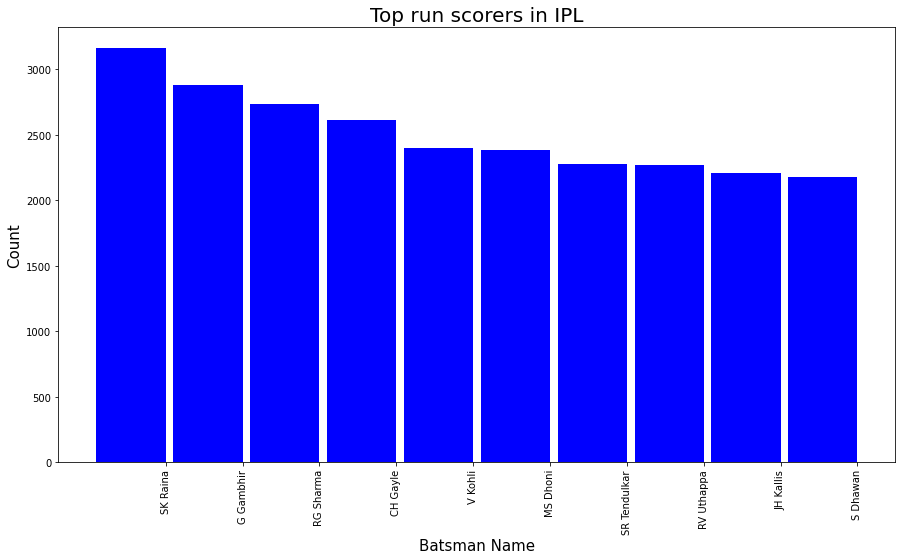

In [54]:
temp_ds2 = ds2.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_ds2 = temp_ds2.iloc[:10,:]
labels = np.array(temp_ds2['batsman'])
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(15,8))
rects = ax.bar(ind, np.array(temp_ds2['batsman_runs']), width=width, color='blue')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title("Top run scorers in IPL", fontsize='20')
ax.set_xlabel('Batsman Name', fontsize='15')
ax.set_ylabel("Count", fontsize='15')
plt.show()


SK Raina is highest run scorer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


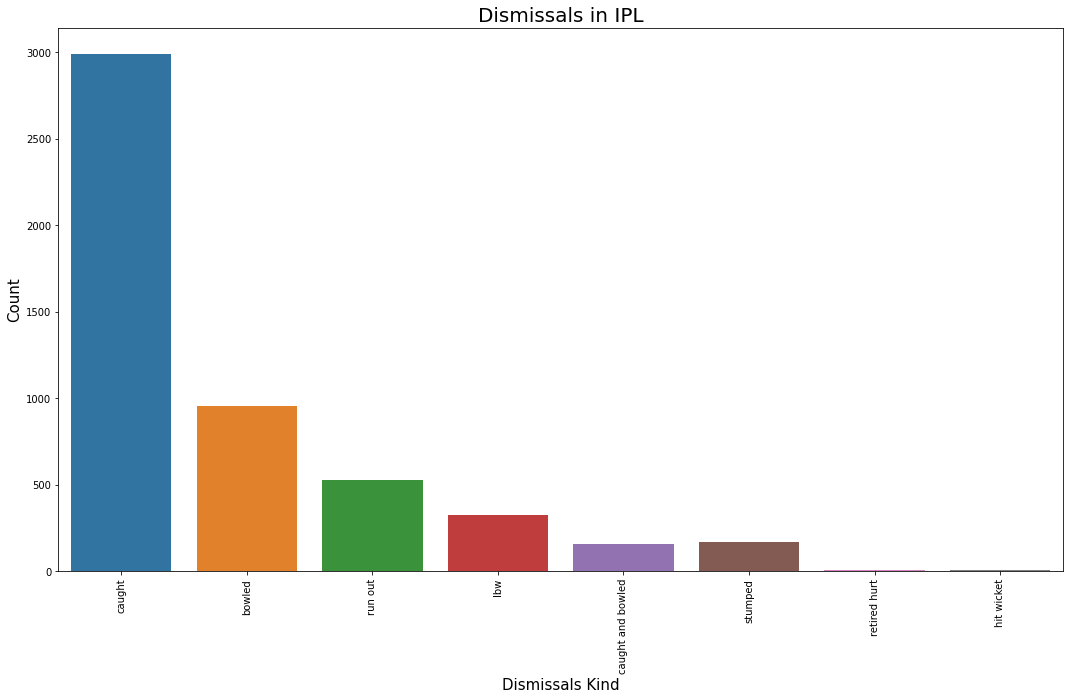

In [52]:
plt.figure(figsize=(18,10))
ax=sns.countplot(ds2.dismissal_kind)
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals Kind",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(rotation=90)
plt.show()